In [44]:
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install Pillow
#!pip3 install pyts
#!pip3 install tifffile

    100% |████████████████████████████████| 133kB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 8.8MB 242kB/s eta 0:00:011
  Running setup.py bdist_wheel for imagecodecs ... error
  Complete output from command /home/smallrig/Documents/Dev/Projects/HumanActivityRecognition/venv/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-lgr7yi4j/imagecodecs/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmpgnu7n175pip-wheel- --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/imagecodecs
  copying imagecodecs/__init__.py -> build/lib.linux-x86_64-3.6/imagecodecs
  copying imagecodecs/_imagecodecs.py -> build/lib.linux-x86_64-3.6/imagecodecs
  copying imagecodecs/__main__.py -> build/lib.linux-x86_64-3.6/imagecodecs
  copying imageco

Failed to build imagecodecs
  Running setup.py install for imagecodecs ... error
    Complete output from command /home/smallrig/Documents/Dev/Projects/HumanActivityRecognition/venv/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-lgr7yi4j/imagecodecs/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-bgsr56sh-record/install-record.txt --single-version-externally-managed --compile --install-headers /home/smallrig/Documents/Dev/Projects/HumanActivityRecognition/venv/include/site/python3.6/imagecodecs:
    running install
    running build
    running build_py
    creating build
    creating build/lib.linux-x86_64-3.6
    creating build/lib.linux-x86_64-3.6/imagecodecs
    copying imagecodecs/__init__.py -> build/lib.linux-x86_64-3.6/imagecodecs
    copying imagecodecs/_imagecodecs.py -> build/lib.linux-x86_64-3.6/imagecodecs
    copying imagecodecs/__m

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import re
import os
import numpy as np

First thing first is to inspect the data, see what it looks like. I don't care about where the data is right now, just want to see it. We will worry about the data layout and creating images from that stuff later.

In [45]:
data_path = './data/a10/p4/s53.txt'
feature_labels = [
    'T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 'T_xmag', 'T_ymag', 'T_zmag',
    'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag',
    'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag',
    'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag',
    'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag'
]
predicted_labels_map = {
    'a01': 'sitting',
    'a02': 'standing',
    'a03': 'lying on back',
    'a04': 'lying on right side',
    'a05': 'ascending stairs',
    'a06': 'descending stairs',
    'a07': 'standing in an elevator',
    'a08': 'moving in elevator',
    'a09': 'walking in lot',
    'a10': 'walking on flat treadmill',
    'a11': 'walking on inclined treadmill',
    'a12': 'running on flat treadmill',
    'a13': 'exercising on stepper',
    'a14': 'exercising on cross-trainer',
    'a15': 'cycling horizontally',
    'a16': 'cycling vertically',
    'a17': 'rowing',
    'a18': 'jumping',
    'a19': 'playing basketball'
}


In [46]:
s01 = pd.read_csv(data_path, names=feature_labels)

In [47]:
s01

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,9.8306,2.75170,1.7109,-0.671510,0.026210,-0.187510,-0.61891,0.002693,-0.62272,10.0550,...,0.22910,-11.7640,-2.00720,2.83190,-0.44629,0.592740,1.18000,0.94456,0.83450,-0.190060
1,10.2080,1.03390,2.5681,-0.512970,-0.021221,-0.042970,-0.61834,0.013309,-0.62170,11.8340,...,0.27382,-10.3260,0.29700,-2.23220,0.79196,-0.443270,1.04260,0.97990,0.80042,-0.206910
2,9.5058,0.54377,2.4252,-0.437870,-0.072341,0.154250,-0.62115,0.022804,-0.62120,11.5220,...,0.32720,-9.8205,-0.69214,-4.15350,-0.30317,-0.070990,1.39400,1.02090,0.75843,-0.186900
3,7.5416,1.24140,2.3627,-0.390800,-0.017260,0.246920,-0.62057,0.038348,-0.61994,10.0420,...,0.33948,-10.5490,0.43445,-0.65191,-0.58086,0.393310,1.27510,1.05020,0.71247,-0.138890
4,6.7527,1.44050,2.3057,-0.390630,-0.012452,0.217650,-0.62243,0.052628,-0.61904,8.1316,...,0.33653,-10.0620,-0.24657,1.19960,-0.42043,-0.044613,1.22820,1.07400,0.66303,-0.101720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,8.3484,0.63757,3.5288,-0.249600,-0.103660,0.119020,-0.63825,0.103770,-0.60723,7.1388,...,0.27573,-9.5539,0.17673,-0.91218,0.36135,-0.050679,1.05230,1.11490,0.45759,-0.051466
121,9.1454,0.63053,3.6915,0.007917,0.011988,0.172760,-0.64000,0.113330,-0.60454,7.5087,...,0.24845,-10.5750,-0.92142,-1.65700,-0.94274,-0.158220,0.96572,1.12840,0.41189,-0.039982
122,9.8526,0.56468,3.9202,-0.042648,0.072063,0.198960,-0.63777,0.120990,-0.60532,8.4071,...,0.22961,-10.0640,-4.24650,-2.03830,-0.82231,-0.448130,0.75084,1.13520,0.37648,-0.040429
123,11.2520,2.18880,4.4040,-0.148850,0.088858,0.009271,-0.64042,0.129950,-0.60441,9.5418,...,0.28675,-10.4070,-2.99770,-1.97350,-0.32116,-0.232500,0.37488,1.13890,0.34890,-0.047402


Data frame looks as we expect it to. Some summary statistics to get a feel for the data

In [48]:
s01.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,9.292610,0.289298,3.058085,-0.027966,0.004146,0.011116,-0.627030,0.053694,-0.623534,9.406722,...,0.294411,-10.134217,-1.248346,-1.137674,-0.092528,0.087657,0.110157,0.994895,0.692867,-0.122410
std,2.008647,1.147761,0.918290,0.467237,0.125124,0.221276,0.008042,0.051850,0.008886,1.955647,...,0.032937,2.614359,6.610308,3.981051,1.217035,0.420766,1.260819,0.125401,0.201661,0.078458
min,6.482400,-2.535200,0.684220,-0.863930,-0.235550,-0.488370,-0.642680,-0.017086,-0.646970,6.370300,...,0.213190,-17.723000,-28.248000,-26.343000,-2.456000,-0.536910,-2.604800,0.786370,0.332400,-0.337330
25%,7.878600,-0.506590,2.474600,-0.415660,-0.075125,-0.171300,-0.633740,0.001076,-0.628930,8.011000,...,0.277040,-11.386000,-3.178200,-2.236100,-0.942740,-0.244050,-1.020200,0.869560,0.496610,-0.180970
50%,9.100000,0.457960,2.933400,-0.123550,-0.017260,0.021223,-0.627130,0.050553,-0.622940,9.081100,...,0.300630,-10.062000,-0.333150,-1.257500,-0.254090,-0.057939,0.683760,1.019200,0.732970,-0.099199
75%,10.241000,1.067500,3.787600,0.338740,0.063363,0.174090,-0.620760,0.104080,-0.617980,10.687000,...,0.315850,-8.754500,2.210800,0.349170,0.738270,0.442930,1.130900,1.117800,0.877700,-0.057985
max,15.278000,2.927600,5.138700,0.990200,0.424150,0.505170,-0.607990,0.139630,-0.604410,15.625000,...,0.350100,-4.967100,17.361000,16.749000,2.849700,0.879950,2.189900,1.165500,0.952180,0.002905


Expectations are that accelerations have larger numbers in general, but everything else is pretty small. The dataset will require normalization for proper image conversion. Lets graph some of the acceleration data, just for the T. 

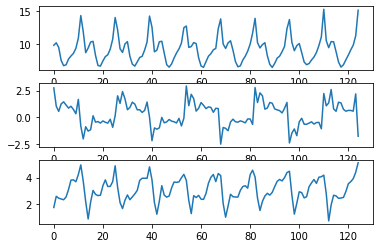

In [49]:
time = range(len(s01))
plt.subplot(3,1,1)
plt.plot(s01['T_xacc'])
plt.subplot(3,1,2)
plt.plot(s01['T_yacc'])
plt.subplot(3,1,3)
plt.plot(s01['T_zacc'])

Note the y axis is different, so on one graph this would look different, but the standard deviation is not too different, so the shapes look mostly the same (more action in the x and z axes than the y axis)

For now, let's branch off into just grabbing the acceleration stats. That's all I'm interested in right now. Later, if we want to use all the features, it should be trivial to account for the rest and produce image representations based on that, as long as our mapping is consistent

I use the simple strategy described in [this paper](https://www.researchgate.net/publication/259899616_Images_in_mind_-_Design_metaphor_and_method_to_classify_driver_distraction_in_critical_situations) to generate images from these variables. 
Steps necessary are

1. Normalize each feature BY SENSOR. If we normalize T_xacc separate from T_yacc, we lose the information that for some activity, there was a lot of acceleration in the x, but no y_acc. This occurs per sensor type because gyroscopes, accelerometers, and magnetometers operate in different units. This also needs to be done by aggregating the data across all segments, not just per segment, because then information loss occurs between different activities. 
2. Convert range of [0,1] to [0,255] for grayscale
3. Save images 

What follows is a quick test of the above flow before tackling it across the data

In [50]:
acceleration_data = s01.filter(regex='acc$', axis=1).values.flatten()
normalized = s01.filter(regex='acc$', axis=1).apply(lambda x: 255 * (x - acceleration_data.min())/np.ptp(acceleration_data))

In [51]:
normalized.describe()

,T_xacc,T_yacc,T_zacc,RA_xacc,RA_yacc,RA_zacc,LA_xacc,LA_yacc,LA_zacc,RL_xacc,RL_yacc,RL_zacc,LL_xacc,LL_yacc,LL_zacc
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,167.266961,127.151560,139.488244,167.775402,143.509120,123.889744,167.312779,110.940102,141.749905,80.546602,126.179974,120.317706,80.708265,120.300392,120.793507
std,8.949783,5.113995,4.091558,8.713635,7.013109,5.344991,8.638649,4.083693,6.758035,20.539111,33.879679,10.522895,11.648609,29.453066,17.738078
min,154.745715,114.566651,128.911186,154.246239,126.656060,114.356345,157.198983,103.024794,131.765817,1.768884,20.282015,89.856634,46.895476,0.000000,8.487970
25%,160.966661,123.605381,136.888452,161.556586,137.796509,118.587854,160.697096,108.111784,135.060754,66.812130,106.567018,116.570346,75.130786,111.701683,115.899329
50%,166.408764,127.903056,138.932694,166.324553,144.942889,123.990525,164.171594,111.072994,142.761860,82.082455,123.182096,119.094905,81.030036,124.378165,120.259606
75%,171.492635,130.618939,142.738691,173.479845,148.539917,128.497169,171.256487,114.037768,146.473397,89.338890,140.435577,122.400490,86.855769,135.713058,127.418328
max,193.935629,138.906851,148.758688,195.481732,157.528254,133.617576,195.802537,120.915029,155.811501,131.956964,255.000000,181.433139,103.731011,203.216701,200.489857


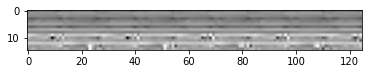

In [52]:
img_array = normalized.to_numpy().astype(np.uint8).T
im = Image.fromarray(img_array)
plt.imshow(img_array, cmap='Greys')
im.save('a01p1s01.png')

The below, until the end, does the actual data reading, normalization, and image saving

In [53]:
stats = {'acc': {}, 'gyro': {}, 'mag': {}}

In [54]:
def update_stats(df):
    acc_data = df.filter(regex='acc$', axis=1).values.flatten()
    stats['acc']['min'] = acc_data.min()
    stats['acc']['max'] = acc_data.max()
    gyro_data = df.filter(regex='gyro$', axis=1).values.flatten()
    stats['gyro']['min'] = gyro_data.min()
    stats['gyro']['max'] = gyro_data.max()
    mag_data = df.filter(regex='mag$', axis=1).values.flatten()
    stats['mag']['min'] = mag_data.min()
    stats['mag']['max'] = mag_data.max()


def get_normalization_stats(path):
    for dirName, subDirs, fileList in os.walk(path):
        if('s01.txt' in fileList):
            for file in fileList:
                df = read_data(os.path.join(dirName,file))
                update_stats(df)
    stats['acc']['ptp'] = stats['acc']['max'] - stats['acc']['min']
    stats['gyro']['ptp'] = stats['gyro']['max'] - stats['gyro']['min']
    stats['mag']['ptp'] = stats['gyro']['max'] - stats['gyro']['min']
            
def create_images(data_path, save_path):
    for dirName, subDirs, fileList in os.walk(data_path):
        if('s01.txt' in fileList):
            for file in fileList:
                df = create_normalized_df(os.path.join(dirName,file))
                # Only care about acc right now.
                df = df.filter(regex='acc$', axis=1)
                save_image(df, os.path.join(dirName,file), save_path)
                
            
def save_image(df, original_path, save_path):
    image_name = create_image_name(original_path)
    img_array = df.to_numpy().astype(np.uint8).T
    im = Image.fromarray(img_array)
    im.save(os.path.join(save_path,image_name))
    
def create_image_name(original_path):
    unlabeled_data = original_path.split('/')[2:]
    unlabeled_data[0] = predicted_labels_map[unlabeled_data[0]].replace(' ', '_')
    return'_'.join(unlabeled_data).replace('.txt', '.png')
            
def read_data(path):
    return pd.read_csv(path, names=feature_labels)
      
def create_normalized_df(path):
        ## TODO reject column_regex if it is not one of
        # acc$, gyro$, mag$, reject
        df = read_data(path)
        #column_key = regex[:len(regex)-1]
        acc_df = df.filter(regex='acc$', axis=1).apply(lambda x: round(255 * (x - stats['acc']['min'])/stats['acc']['ptp']))
        gyro_df = df.filter(regex='gyro$', axis=1).apply(lambda x: round(255 * (x - stats['gyro']['min'])/stats['gyro']['ptp']))
        mag_df = df.filter(regex='mag$', axis=1).apply(lambda x: round(255 * (x - stats['mag']['min'])/stats['mag']['ptp']))
        
        return acc_df.join(gyro_df).join(mag_df)
          

In [55]:
data_path = './data'
save_path = './images'
get_normalization_stats(data_path)

stats

{'acc': {'min': -20.463, 'max': 17.864, 'ptp': 38.327},
 'gyro': {'min': -3.5895, 'max': 3.5001, 'ptp': 7.089600000000001},
 'mag': {'min': -0.57703, 'max': 0.61703, 'ptp': 7.089600000000001}}

We can see that the stats have been populated. With them, we'll normalized each segement of data and create an image for it. 

**Note**: I've read that using ptp can be dangerous if there is a 0 difference array, and that borrowing `minmax_scale` from sklearn might be more appropriate.

In [56]:
create_images(data_path, save_path)